# Freedom of media and speach report

In [122]:
#setup and install the package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker



In [123]:
#read the data from the csv file and store it in a dataframe
freedomhouse = pd.read_csv('FHdataset2.csv', sep = ';', on_bad_lines= 'skip')

freedomhouse = freedomhouse.rename(columns = {
    'Country/Territory' : 'country',
    'Edition' : 'year',
    'D1': 'media',
    'D4': 'speech',
    'Total': 'total',
})


### Basic analysis

           media    speech     total
media   1.000000  0.862372  0.932256
speech  0.862372  1.000000  0.908731
total   0.932256  0.908731  1.000000


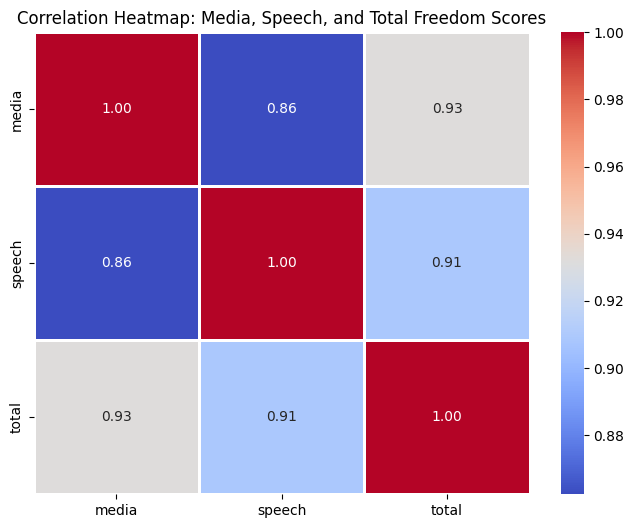

In [124]:
# Calculate the correlation matrix for media, speech and total columns
correlation_matrix_media_speech_total = freedomhouse[['media', 'speech', 'total']].corr()

# Display the correlation matrix for media, speech and total columns
print(correlation_matrix_media_speech_total)

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(correlation_matrix_media_speech_total, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.8)

# Set title
plt.title("Correlation Heatmap: Media, Speech, and Total Freedom Scores")

# Show plot
plt.show()

The strong positive correlations between media freedom, speech freedom, and the total freedom score indicate that these factors are deeply interconnected. Countries with higher media and speech freedom tend to have higher overall freedom ratings, suggesting that restrictions in one area can significantly impact overall democratic health. Protecting media and speech freedoms is crucial for maintaining broader civil liberties and political rights.

The high correlations between media freedom, speech freedom, and total freedom scores align with the Freedom in the World 2024 methodology, which emphasizes these factors as key indicators of democracy. Countries with higher media freedom tend to have stronger civil liberties, while restrictions in media and speech often correlate with declining overall freedom. This confirms that protecting media and speech rights is essential for maintaining democratic governance.

In [125]:
# Calculate the proportion of cases where media freedom is higher than speech freedom
media_higher_than_speech = (freedomhouse['media'] > freedomhouse['speech']).sum()
total_cases = freedomhouse.shape[0]

# Compute percentage
percentage = round((media_higher_than_speech / total_cases) * 100, 4)

# Print formatted statement
print(f"In only {percentage}% of cases, the media freedom score is higher than the speech freedom score.")


In only 1.7893% of cases, the media freedom score is higher than the speech freedom score.


In only 1.79% of cases, the media freedom score is higher than the speech freedom score. This suggests that media restrictions often coincide with broader speech limitations, reinforcing the idea that press freedom is typically constrained alongside general speech rights.

### Clustering and map visualisation

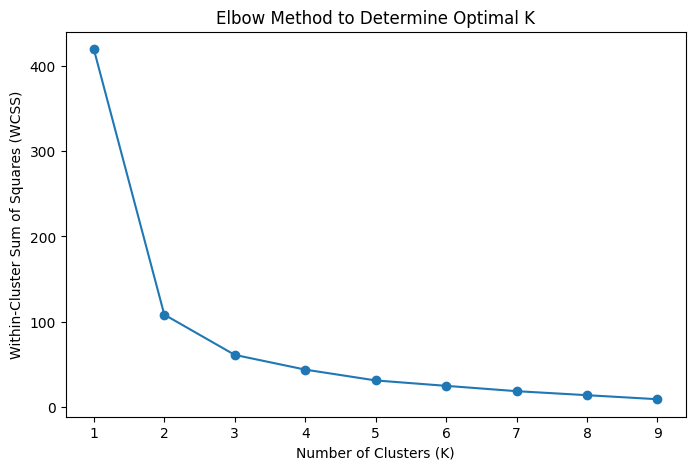

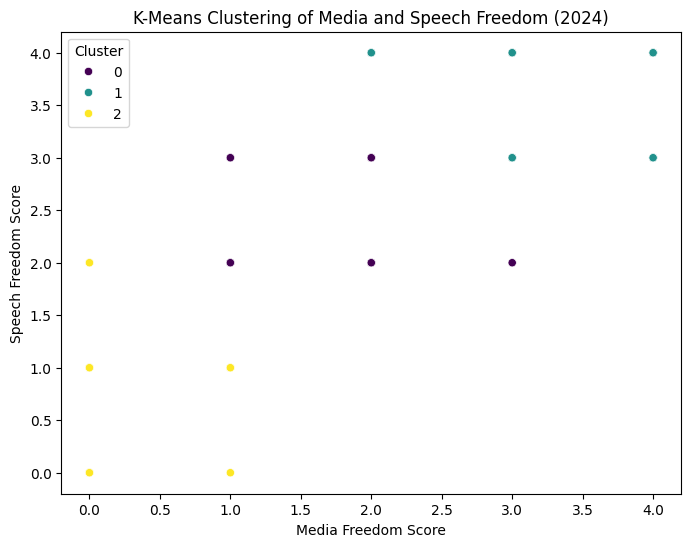

In [126]:
# Ensure we only use data from Edition 2024 and drop missing values
freedomhouse_filtered = freedomhouse[freedomhouse['year'] == 2024].dropna(subset=['media', 'speech'])

# Select relevant columns for clustering
data = freedomhouse_filtered[['media', 'speech']]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Find optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# Choose optimal number of clusters
optimal_k = 3  # Adjust based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
freedomhouse_filtered['cluster'] = kmeans.fit_predict(data_scaled) 

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=freedomhouse_filtered['media'], y=freedomhouse_filtered['speech'], hue=freedomhouse_filtered['cluster'], palette='viridis')
plt.xlabel("Media Freedom Score")
plt.ylabel("Speech Freedom Score")
plt.title("K-Means Clustering of Media and Speech Freedom (2024)")
plt.legend(title="Cluster")
plt.show()


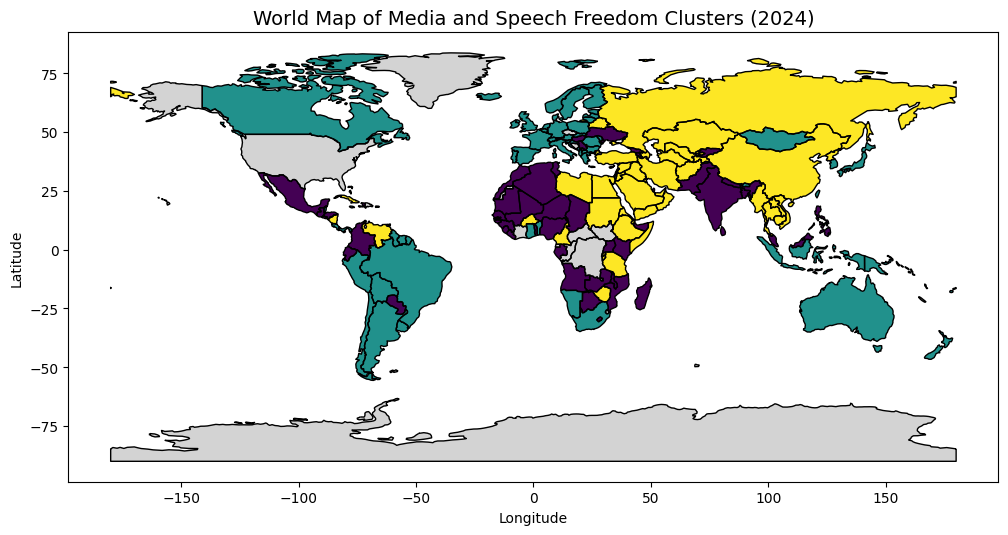

In [119]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map dataset (Natural Earth dataset)
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Ensure country names are properly formatted
freedomhouse_filtered['country'] = freedomhouse_filtered['country'].str.strip()

# Merge clustering results with world map data
merged = world.merge(freedomhouse_filtered[['country', 'cluster']], how='left', left_on='NAME', right_on='country')

# Plot the clusters on the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color='black')  # Draw country borders
merged.plot(column='cluster', cmap='viridis', legend=False, ax=ax, missing_kwds={'color': 'lightgrey'})  # Color by cluster

# Titles and labels
plt.title("World Map of Media and Speech Freedom Clusters (2024)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


MAP DISCLAIMER: Czech Republic and United States should be green because based on their values to media and speech values they belong to cluster 1 (green cluster). We think Czech Republic and United States might stayed grey because of different names used for this countries (e.g. Czechia, USA)

The world map visualization shows that media and speech freedom are strongly influenced by political and regional factors. Countries with low scores for freedom of media and speech (marked in yellow) are mostly authoritarian regimes such as Russia, China, Middle East and some African nations, where governments tightly control the press and public discourse. These regions often experience censorship, suppression of independent journalism, and restrictions on free speech.

Countries with middle scores for freedom of media (dark purple) represent countries with partial some level of freedom of speech and to some extent independent media. Some xxamples of these coutries are Mexico, India, Hungary and Ukraine. These nations may have some press and speech protections, but they also face government intervention, legal restrictions, or societal pressures that limit full freedoms.

The highest freedom scores (green) are concentrated in Western democracies like North America, most of the Europe, and Australia. These countries have strong legal protections for free speech and media independence, allowing for open political discourse and press transparency.

This clustering reinforces the direct connection between governance and freedom. Countries with strong democratic institutions tend to protect speech and media rights, while authoritarian or unstable governments are more likely to impose restrictions and censorship.

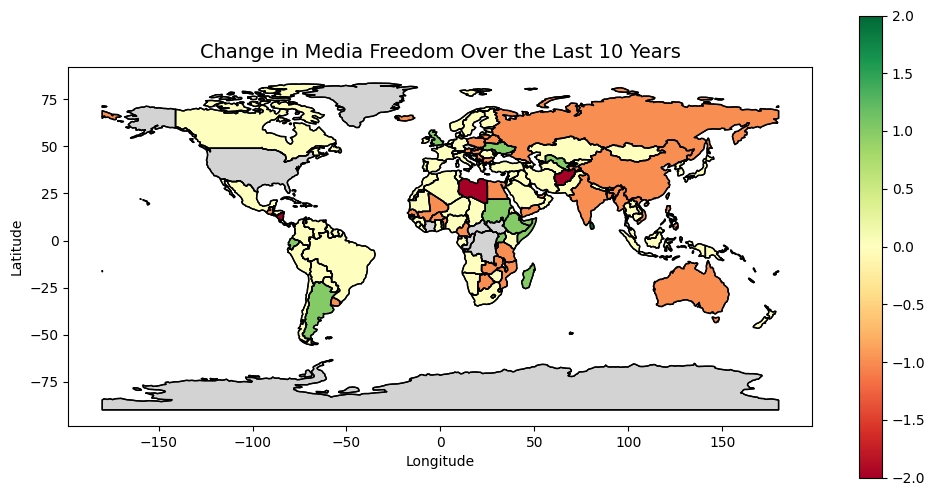

In [72]:
# Load dataset
file_path = "FHdataset2.csv"  # Update if needed
freedomhouse = pd.read_csv(file_path, sep=';', on_bad_lines='skip')

# Rename necessary columns for better readability
freedomhouse = freedomhouse.rename(columns={'Country/Territory': 'country', 'D1': 'media', 'Edition': 'year'})

# Convert year to integer for proper filtering
freedomhouse['year'] = pd.to_numeric(freedomhouse['year'], errors='coerce')

# Select only the last 10 years of data
latest_year = freedomhouse['year'].max()
earliest_year = latest_year - 10

# Filter dataset to include only relevant years
freedom_10yrs = freedomhouse[freedomhouse['year'].between(earliest_year, latest_year)]

# Pivot table to get media freedom scores for start and end years
freedom_pivot = freedom_10yrs.pivot(index='country', columns='year', values='media')

# Compute the change in media freedom score (latest year - earliest year)
freedom_pivot['change'] = freedom_pivot[latest_year] - freedom_pivot[earliest_year]

# Load world map from Natural Earth GeoJSON
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Ensure country names are properly formatted
freedom_pivot.reset_index(inplace=True)
freedom_pivot['country'] = freedom_pivot['country'].str.strip()

# Merge world map with the computed change data
world = world.merge(freedom_pivot[['country', 'change']], left_on='NAME', right_on='country', how='left')

# Set custom colormap with neutral zero
cmap = plt.cm.RdYlGn  # Red for decline, Green for improvement
norm = mcolors.TwoSlopeNorm(vmin=freedom_pivot['change'].min(), 
                            vcenter=0,  # Neutral zero
                            vmax=freedom_pivot['change'].max())

# Plot the world map with media freedom changes
fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color="black")  # Country borders

# Plot the change in media freedom using a custom color scale
world.plot(column='change', cmap=cmap, norm=norm, legend=True, ax=ax,
           missing_kwds={"color": "lightgrey"}, edgecolor="black")

# Add titles and labels
plt.title("Change in Media Freedom Over the Last 10 Years", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()



Over the past 10 years, media freedom has declined in many regions, particularly in Russia, parts of Asia, and some African countries, where government control over the press has tightened, often due to political instability, authoritarian policies, or increased censorship laws.

In contrast, some South American and African nations have shown improvements, likely due to democratic reforms, reduced government intervention, or increased press protections. Many countries have remained stable with little change.

The widespread decline suggests a global trend where governments are imposing stricter controls on information flow, often under the pretext of national security, political stability, or combating misinformation. Meanwhile, countries that improved may have benefited from stronger legal protections, international influence, or civil society efforts.

### The development of the freedom in different views

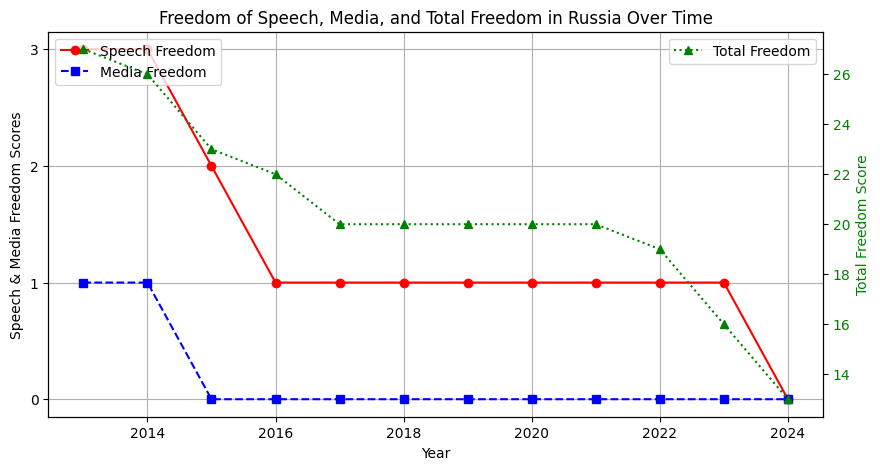

In [89]:
# Filter data for Russia
russia_data = freedomhouse[freedomhouse["country"] == "Russia"].sort_values(by="year")

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Freedom of Speech (D4) and Media Freedom (D1) on the primary axis
ax1.plot(russia_data["year"], russia_data["speech"], marker="o", linestyle="-", color="red", label="Speech Freedom")
ax1.plot(russia_data["year"], russia_data["media"], marker="s", linestyle="--", color="blue", label="Media Freedom")

# Axis formatting
ax1.set_xlabel("Year")
ax1.set_ylabel("Speech & Media Freedom Scores", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_title("Freedom of Speech, Media, and Total Freedom in Russia Over Time")

# Create secondary y-axis for Total Freedom
ax2 = ax1.twinx()
ax2.plot(russia_data["year"], russia_data["total"], marker="^", linestyle=":", color="green", label="Total Freedom")

# Formatting second y-axis
ax2.set_ylabel("Total Freedom Score", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Set integer ticks for axis
ax1.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Grid and show
ax1.grid(True)
plt.show()


The graph shows a sharp decline in Russia’s freedom of speech and media freedom over the past decade, with a particularly steep drop around 2015. Since then, both freedoms have remained severely restricted. Media freedom has been almost nonexistent, while speech freedom remains very low, reflecting increased government censorship, suppression of dissent, and tighter control over independent journalism. The total freedom score has also steadily declined, aligning with growing authoritarian policies, crackdowns on opposition, and control over public discourse, especially in the wake of geopolitical conflicts and domestic repression.

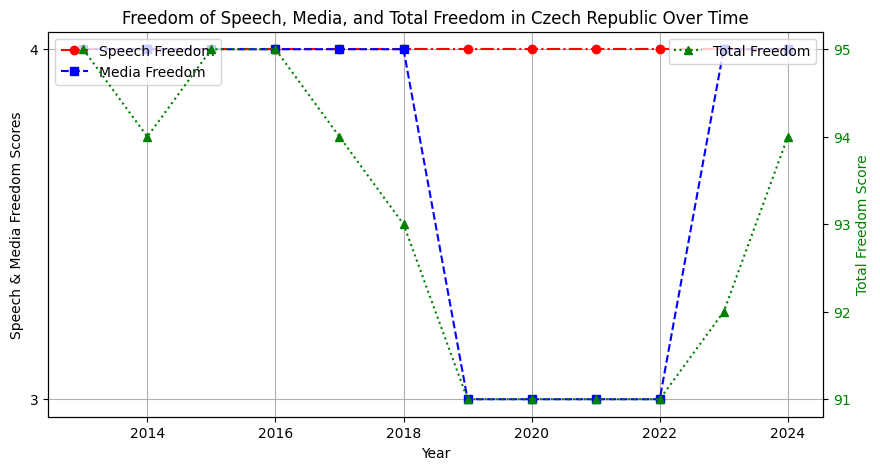

In [88]:


# Filter data for Czech Republic
czech_data = freedomhouse[freedomhouse["country"] == "Czech Republic"].sort_values(by="year")

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Freedom of Speech (D4) and Media Freedom (D1) on the primary axis
ax1.plot(czech_data["year"], czech_data["speech"], marker="o", linestyle="-.", color="red", label="Speech Freedom")
ax1.plot(czech_data["year"], czech_data["media"], marker="s", linestyle="--", color="blue", label="Media Freedom")

# Axis formatting
ax1.set_xlabel("Year")
ax1.set_ylabel("Speech & Media Freedom Scores", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_title("Freedom of Speech, Media, and Total Freedom in Czech Republic Over Time")
ax1.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Create secondary y-axis for Total Freedom
ax2 = ax1.twinx()
ax2.plot(czech_data["year"], czech_data["total"], marker="^", linestyle=":", color="green", label="Total Freedom")

# Formatting second y-axis
ax2.set_ylabel("Total Freedom Score", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Set integer ticks for axis
ax1.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Grid and show
ax1.grid(True)
plt.show()


The **Czech Republic's graph** reflects a **consistently high level of speech and media freedom**, with scores remaining stable around **4**, reinforcing its status as a **strong democracy**. However, the **decline in total freedom around 2019-2020** suggests a temporary setback, likely influenced by the **COVID-19 pandemic**. During this period, **emergency measures, restrictions on movement, and press limitations** may have contributed to the drop. Unlike more authoritarian trends seen in other countries, the Czech Republic’s freedom levels **rebounded**, indicating that any restrictions were **temporary and not systematically repressive**. In contrast, **Russia's graph** shows a **steep and sustained decline** in both **speech and media freedom**, reaching **near-zero** by 2024. While **Czech democracy remained resilient despite challenges**, **Russia's trend highlights increasing authoritarianism, media suppression, and loss of civil liberties**.

In [91]:
# Create a new column for the sum of media and speech freedom
freedomhouse["freedom_sum"] = freedomhouse["media"] + freedomhouse["speech"]

# Sort dataset by country and year
freedomhouse = freedomhouse.sort_values(by=["country", "year"])

# Calculate yearly change in the sum of media and speech freedom for each country
freedomhouse["freedom_change"] = freedomhouse.groupby("country")["freedom_sum"].diff()

# Find the biggest single-year increase
max_increase = freedomhouse["freedom_change"].max()
biggest_increases = freedomhouse[freedomhouse["freedom_change"] == max_increase][["country", "year", "freedom_change"]]

# Find the biggest single-year decrease
max_decrease = freedomhouse["freedom_change"].min()
biggest_decreases = freedomhouse[freedomhouse["freedom_change"] == max_decrease][["country", "year", "freedom_change"]]

# Print the results
print("Biggest Single-Year Increase in Media + Speech Freedom:")
print(biggest_increases)

print("\nBiggest Single-Year Decrease in Media + Speech Freedom:")
print(biggest_decreases)


Biggest Single-Year Increase in Media + Speech Freedom:
         country  year  freedom_change
1442  The Gambia  2018             4.0

Biggest Single-Year Decrease in Media + Speech Freedom:
              country  year  freedom_change
124  Nagorno-Karabakh  2024            -5.0


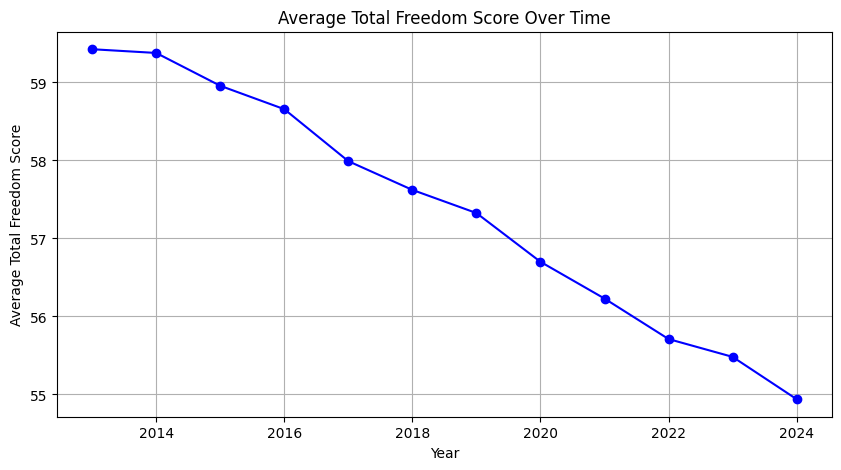

In [92]:
# Group by year and calculate the average total freedom score
avg_total_freedom = freedomhouse.groupby("year")["total"].mean()

# Plot the trend of total freedom average over time
plt.figure(figsize=(10, 5))
plt.plot(avg_total_freedom.index, avg_total_freedom.values, marker='o', linestyle='-', color='blue')

# Formatting the graph
plt.xlabel("Year")
plt.ylabel("Average Total Freedom Score")
plt.title("Average Total Freedom Score Over Time")
plt.grid(True)

# Show the graph
plt.show()

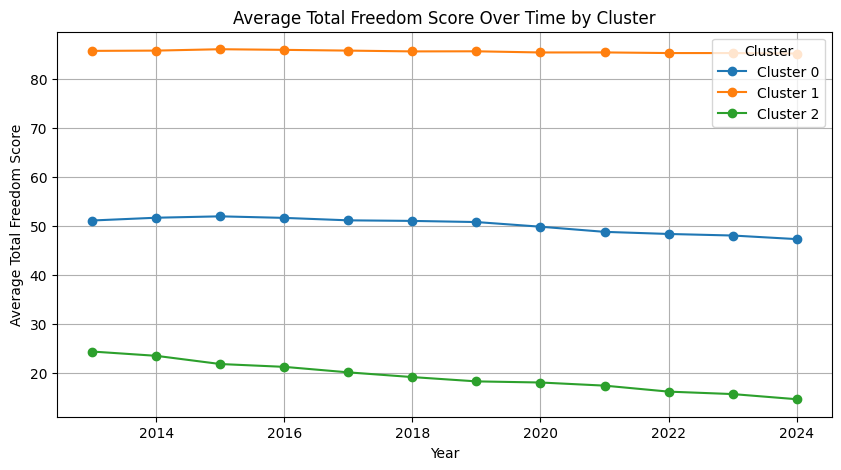

In [127]:
# Convert year column to numeric
freedomhouse["year"] = pd.to_numeric(freedomhouse["year"], errors="coerce")

# Ensure clustering data exists
if "cluster" not in freedomhouse_filtered.columns:
    raise ValueError("The dataset does not contain a 'cluster' column. Ensure clustering is applied before running this.")

# Merge cluster labels back into the full dataset using country names
freedomhouse = freedomhouse.merge(
    freedomhouse_filtered[["country", "cluster"]],
    on="country",
    how="left"
)

# Group by year and cluster, calculating the average total freedom score
avg_total_freedom_clusters = freedomhouse.groupby(["year", "cluster"])["total"].mean().reset_index()

# Plot the trend of total freedom average over time for each cluster
plt.figure(figsize=(10, 5))

# Iterate over clusters and plot each one separately
for cluster in avg_total_freedom_clusters["cluster"].dropna().unique():
    cluster_data = avg_total_freedom_clusters[avg_total_freedom_clusters["cluster"] == cluster]
    plt.plot(cluster_data["year"], cluster_data["total"], marker='o', linestyle='-', label=f"Cluster {int(cluster)}")

# Formatting the graph
plt.xlabel("Year")
plt.ylabel("Average Total Freedom Score")
plt.title("Average Total Freedom Score Over Time by Cluster")
plt.legend(title="Cluster")
plt.grid(True)

# Show the graph
plt.show()


The first graph illustrates the overall decline in global total freedom scores over the past decade. This trend aligns with reports from Freedom House and V-Dem Institute, which document a rise in authoritarianism, media suppression, and democratic backsliding across multiple regions. Factors such as political instability, restrictive policies, surveillance expansion, and conflicts (e.g., Russia-Ukraine war, Myanmar coup, Nagorno-Karabakh crisis) have contributed to this decline, with press freedoms and civil liberties being increasingly restricted.

The second graph provides a cluster-based analysis of total freedom scores. The highest-scoring cluster (Cluster 1) represents stable democracies, where freedom levels have remained relatively unchanged. Cluster 0, likely representing partially free nations, shows a slight but consistent decline, indicating gradual democratic erosion in these countries. Cluster 2, representing authoritarian regimes, has experienced the sharpest decline, confirming that autocratic governments are becoming more repressive over time. This visualization highlights the growing gap between democratic and authoritarian nations, with democratic resilience in some regions but worsening conditions in others.